In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

data = pd.read_csv('D:\Belajar\Project Py\Dataset\climate-model-simulation-crashes.csv', sep=',')
data.head()

# These are data of climate model simulation crash by D. Lucas, R. Klein, J. Tannahill, D. Ivanova, S. Brandon, D. Domyancic, Y. Zhang. 


# The goal is to predict climate model simulation outcomes (column 21, fail or succeed) given scaled values of climate model input parameters (columns V3-V20)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Class
0,1,1,502,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,1
1,1,2,249,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,...,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256,2
2,1,3,202,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,...,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858,2
3,1,4,56,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,...,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987,2
4,1,5,278,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,...,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283,2


In [2]:
# check for any null values
data.isnull().any()

V1       False
V2       False
V3       False
V4       False
V5       False
V6       False
V7       False
V8       False
V9       False
V10      False
V11      False
V12      False
V13      False
V14      False
V15      False
V16      False
V17      False
V18      False
V19      False
V20      False
Class    False
dtype: bool

In [3]:
# check the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 21 columns):
V1       540 non-null int64
V2       540 non-null int64
V3       540 non-null int64
V4       540 non-null float64
V5       540 non-null float64
V6       540 non-null float64
V7       540 non-null float64
V8       540 non-null float64
V9       540 non-null float64
V10      540 non-null float64
V11      540 non-null float64
V12      540 non-null float64
V13      540 non-null float64
V14      540 non-null float64
V15      540 non-null float64
V16      540 non-null float64
V17      540 non-null float64
V18      540 non-null float64
V19      540 non-null float64
V20      540 non-null float64
Class    540 non-null int64
dtypes: float64(17), int64(4)
memory usage: 88.7 KB


In [4]:
# check the number of data
data.count()

V1       540
V2       540
V3       540
V4       540
V5       540
V6       540
V7       540
V8       540
V9       540
V10      540
V11      540
V12      540
V13      540
V14      540
V15      540
V16      540
V17      540
V18      540
V19      540
V20      540
Class    540
dtype: int64

In [5]:
# set the independent variable which are V3 to V20
x = data.iloc[:, 2:20].astype(float)

# set the dependent variable which is 'Class'
# and change the classification to 1 and 0, from previous 2 and 1 respectively
y = data[['Class']].astype(float)
y = y['Class'].apply(lambda x: 1 if x==2 else 0)

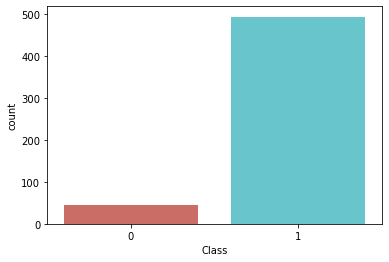

In [6]:
# quick review on the distribution of the y
# seems unbalanced, but its fine
y1 = pd.DataFrame(y)
y1.rename(columns={0:'Class'}, inplace=True)
sns.countplot(x='Class', data=y1, palette='hls')
plt.show()

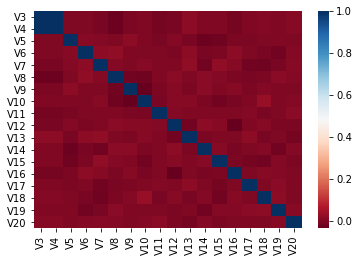

In [7]:
# check for any multicollinearity that may affect our logit model
correlation = x.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, cmap='RdBu')

In [8]:
# V3 and V4 seem very similar, lets check it again with VIF
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_now = sm.tools.add_constant(data)
series_new = pd.Series([variance_inflation_factor(x_now.values, i) for i in range(x_now.shape[1])], index=x_now.columns)

series_new

C:\Users\Asus\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const      124.079823
V1           1.005291
V2           1.052681
V3       58147.219820
V4       58149.162157
V5           1.010912
V6           1.009069
V7           1.009011
V8           1.010778
V9           1.008871
V10          1.015053
V11          1.007165
V12          1.011242
V13          1.002527
V14          1.007383
V15          1.055050
V16          1.047192
V17          1.013763
V18          1.022584
V19          1.006971
V20          1.004335
Class        1.231470
dtype: float64

In [9]:
# massive number for V3 and V4, for this practice case, lets drop V3
x.drop('V3', axis=1, inplace=True)
x.head()

,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20
0,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,0.474370,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893
1,0.457728,0.359448,0.306957,0.843331,0.934851,0.444572,0.828015,0.296618,0.616870,0.975786,0.914344,0.845247,0.864152,0.346713,0.356573,0.438447,0.512256
2,0.373238,0.517399,0.504993,0.618903,0.605571,0.746225,0.195928,0.815667,0.679355,0.803413,0.643995,0.718441,0.924775,0.315371,0.250642,0.285636,0.365858
3,0.104055,0.197533,0.421837,0.742056,0.490828,0.005525,0.392123,0.010015,0.471463,0.597879,0.761659,0.362751,0.912819,0.977971,0.845921,0.699431,0.475987
4,0.513199,0.061812,0.635837,0.844798,0.441502,0.191926,0.487546,0.358534,0.551543,0.743877,0.312349,0.650223,0.522261,0.043545,0.376660,0.280098,0.132283


In [10]:
# check for outliers (+- 3 standard dev from mean)
from scipy import stats
data[(np.abs(stats.zscore(data))>3).any(axis=1)]

# Lots of data, but lets leave it at is

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,Class
0,1,1,502,0.927825,0.252866,0.298838,0.170521,0.735936,0.428325,0.567947,...,0.245675,0.104226,0.869091,0.997518,0.448620,0.307522,0.858310,0.796997,0.869893,1
12,1,13,527,0.976907,0.857929,0.614971,0.615516,0.352769,0.833960,0.095092,...,0.954833,0.577182,0.783511,0.530425,0.175170,0.544458,0.081392,0.733015,0.531369,1
43,1,44,488,0.904871,0.965467,0.763904,0.633559,0.759305,0.216830,0.255341,...,0.368365,0.747902,0.934944,0.956876,0.420295,0.986997,0.955677,0.485108,0.206474,1
48,1,49,423,0.783255,0.959955,0.054978,0.422302,0.189559,0.768513,0.898006,...,0.696245,0.014254,0.848723,0.269197,0.317335,0.365386,0.732467,0.445872,0.003184,1
57,1,58,469,0.867315,0.436953,0.070029,0.144875,0.199279,0.701177,0.366411,...,0.127939,0.687026,0.971489,0.025957,0.344136,0.099746,0.207240,0.000465,0.949122,1
62,1,63,401,0.741596,0.781656,0.033420,0.239747,0.149745,0.405233,0.937797,...,0.034082,0.633758,0.319370,0.992912,0.408746,0.385854,0.554430,0.455547,0.250476,1
77,1,78,457,0.845611,0.033890,0.382948,0.645635,0.932791,0.040095,0.549632,...,0.923008,0.353318,0.828581,0.865206,0.084083,0.367433,0.537126,0.087576,0.272303,1
84,1,85,322,0.597218,0.309078,0.983514,0.279500,0.900335,0.760158,0.204950,...,0.755481,0.862397,0.703169,0.554544,0.327932,0.829222,0.054988,0.977709,0.504756,1
85,1,86,530,0.979196,0.256344,0.011956,0.553195,0.554762,0.583126,0.922551,...,0.768534,0.913489,0.183761,0.839340,0.285804,0.907020,0.461765,0.635196,0.021074,1
92,1,93,373,0.691416,0.526029,0.082364,0.104676,0.789402,0.805434,0.631110,...,0.291983,0.413248,0.654471,0.873086,0.078749,0.570525,0.639430,0.678007,0.991041,1


In [11]:
# split the data before modelling
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# modelling using LogisticRegression()
# changes in fit_intercept=False and C=1e9 to make the regularization in scikit-learn ineffective
# and force the intercept to 0
# other reason to match the result with statsmodels logit function result
Lr = LogisticRegression(fit_intercept=False, C=1e9)
Lr.fit(x_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Coefficient for each variable
Lr.coef_

array([[-4.51529607, -0.37086893,  1.67157145,  1.02502251,  1.67563598,
         1.18266596,  0.87872514,  0.91821946, -0.07459   ,  0.24643981,
         0.11316235, -2.22471143,  2.7023906 , -0.05763065,  1.99699146,
         1.62835252,  0.46454261]])

In [13]:
# intercept
Lr.intercept_

array([0.])

In [14]:
# check for the confusion matrix using y_test as actual
y_pred = Lr.predict(x_test)
confusion_matrix(y_test, y_pred)

# seems good

array([[ 1,  7],
       [ 3, 97]], dtype=int64)

In [15]:
# review on the accuracy, precision, recall, f1-score, and support
from sklearn.metrics import classification_report
print('Accuracy of logistic regression on test set =', Lr.score(x_test, y_test))
print()
print(classification_report(y_test, y_pred))

# amazing accuracy at approx. 0.93
# high precision on 1, and nothing on 0, this due to unrandomized state during the split of test and train.
# there may no class 0 in test set

Accuracy of logistic regression on test set = 0.9074074074074074

              precision    recall  f1-score   support

           0       0.25      0.12      0.17         8
           1       0.93      0.97      0.95       100

    accuracy                           0.91       108
   macro avg       0.59      0.55      0.56       108
weighted avg       0.88      0.91      0.89       108



In [16]:
# quick review on the probability for each in y_test
Lr.predict_proba(x_test)

# all of them are on high P for class 1, due to the reason I explained earlier.

array([[9.56411001e-03, 9.90435890e-01],
       [2.88879152e-02, 9.71112085e-01],
       [7.59011771e-02, 9.24098823e-01],
       [4.82844617e-02, 9.51715538e-01],
       [6.32502400e-02, 9.36749760e-01],
       [1.12721010e-02, 9.88727899e-01],
       [1.84643102e-01, 8.15356898e-01],
       [8.93884174e-04, 9.99106116e-01],
       [1.43410845e-01, 8.56589155e-01],
       [6.67327419e-01, 3.32672581e-01],
       [5.76121318e-03, 9.94238787e-01],
       [9.67512581e-02, 9.03248742e-01],
       [3.50306994e-02, 9.64969301e-01],
       [2.03136030e-03, 9.97968640e-01],
       [7.44274903e-03, 9.92557251e-01],
       [3.84515940e-02, 9.61548406e-01],
       [1.84628693e-02, 9.81537131e-01],
       [3.64182941e-02, 9.63581706e-01],
       [3.30060085e-01, 6.69939915e-01],
       [4.74098506e-01, 5.25901494e-01],
       [1.04899343e-01, 8.95100657e-01],
       [3.25500036e-01, 6.74499964e-01],
       [5.17705859e-02, 9.48229414e-01],
       [9.57786366e-02, 9.04221363e-01],
       [1.013286

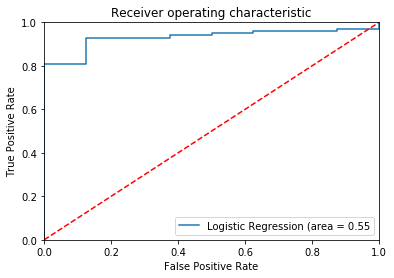

In [17]:
# check on ROC AUC graph
# huge credit to Ms. Susan Li, for sharing her code for ROC AUC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, Lr.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, Lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label=f'Logistic Regression (area = {logit_roc_auc:0.2f}')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

# due to no class 0 in y_test, doesn't start from 0 in y
# and the True Positive Rate is always high, this shows good prediction model

In [18]:
# lets use Statsmodels library to fit logistic regression model.
model_logit = sm.Logit(y_train, x_train)
res = model_logit.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.204195
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  432
Model:                          Logit   Df Residuals:                      415
Method:                           MLE   Df Model:                           16
Date:                Fri, 07 Feb 2020   Pseudo R-squ.:                  0.3143
Time:                        01:38:28   Log-Likelihood:                -88.212
converged:                       True   LL-Null:                       -128.65
Covariance Type:            nonrobust   LLR p-value:                 1.157e-10
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V4            -4.5153      0.882     -5.119      0.000      -6.244      -2.787
V5            -0.3709      0.708     -0.523      0.601      -1.759       1.018
V6             1.6716      0.708      2.362      0.018       0.284       3.059
V7             1.0250      0.693      1.480      0.139      -0.333       2.383
V8             1.6757      0.674      2.488      0.013       0.355       2.996
V9             1.1826      0.717      1.650      0.099      -0.222       2.587
V10            0.8787      0.673      1.306      0.191      -0.440       2.197
V11            0.9183      0.725      1.267      0.205      -0.503       2.339
V12           -0.0746      0.682     -0.109      0.913      -1.411       1.262
V13            0.2465      0.671      0.367      0.713      -1.069       1.562
V14            0.1132      0.675      0.168      0.867      -1.211       1.437
V15           -2.2248      0.758     -2.935      0.003      -3.711      -0.739
V16            2.7024      0.750      3.606      0.000       1.233       4.171
V17           -0.0577      0.682     -0.085      0.933      -1.394       1.279
V18            1.9970      0.730      2.735      0.006       0.566       3.428
V19            1.6283      0.729      2.235      0.025       0.200       3.056
V20            0.4646      0.663      0.701      0.483      -0.834       1.763
==============================================================================
"""

In [19]:
# some values have p-values > 0.05 which are unnecessary in the model
# lets drop V5, V7, V9, V10, V11, V12, V13, V14, V17, and V20
# oh boy thats a lot
x_new = x.drop(['V5', 'V7', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V17', 'V20'], axis=1)
model_new = sm.Logit(y, x_new)
res_new = model_new.fit()
res_new.summary()

Optimization terminated successfully.
         Current function value: 0.215928
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  540
Model:                          Logit   Df Residuals:                      533
Method:                           MLE   Df Model:                            6
Date:                Fri, 07 Feb 2020   Pseudo R-squ.:                  0.2586
Time:                        01:38:28   Log-Likelihood:                -116.60
converged:                       True   LL-Null:                       -157.28
Covariance Type:            nonrobust   LLR p-value:                 1.877e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
V4            -3.2197      0.610     -5.277      0.000      -4.416      -2.024
V6             2.0407      0.575      3.551      0.000       0.914       3.167
V8             1.9432      0.572      3.400      0.001       0.823       3.064
V15           -1.8236      0.603     -3.024      0.002      -3.006      -0.641
V16            3.7704      0.667      5.655      0.000       2.464       5.077
V18            2.1796      0.615      3.543      0.000       0.974       3.386
V19            2.0164      0.602      3.349      0.001       0.836       3.197
==============================================================================
"""

In [20]:
# Done and looks good
# We now have the values we need for predicting climate model simulation, though we had to drop some variables.
# That may be the evaluation for the future test parameter considerations.